# Topic: ข้อมูลการใช้งาน อินเทอร์เน็ตประชารัฐ

# Dataset: องค์กรสำนักงานปลัดกระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม

    - https://data.go.th/dataset/village_internet_usage
    - ข้อมูลการให้จุดติดตั้งอินเทอร์เน็ต 1 จุดต่อ 1 หมู่บ้าน จำนวนหมู่บ้านทั้วประเทศ 24,700 หมู่บ้าน
    - ใช้ข้อมูล 3 เดือนย้อนหลัง (กันยายน,สิงหาคม,กรกฎาคม) ปี 2564
    - ดึงข้อมูลจากไฟล์ csv 3 file (จำนวนแถวข้อมูลมี 24700 แถว)
    - ไฟล์ข้อมูลที่รวมกันแล้วมีทั้งหมด (มี 74100 rows × 18 columns)
    
    ***สาเหตุที่ใช้ข้อมูลมาวิเคราะห์จำนวน 3 เพื่อต้องการเทียบค่าเฉลี่ยให้เห็น จากปริมาณการใช้งาน(ข้อมูลของภาครัฐ มีอัพเดตและเผยแพร่ ถึงแค่ปี พ.ศ. 2564) 

# Question : 

    คำถามในการใช้ข้อมูลชุดนี้ :
    
        1. การใช้งานอินเทอร์เน็ต ปริมาณการ UPLOAD,DOWNLOAD แต่ละเดือนเฉลียนมากน้อยเพียงใดและเพียงพอหรือไม่ต่อการใช้งาน ?
        
        2. การที่รัฐให้บริการอินเทอร์เน็ต 1 จุดต่อ 1 หมู่บ้าน "แบบใช้ฟรี" จะมีคนมาใช้งานมากหรือน้อยเพียงใด?
        
        3. อนาคตทางภาครัฐจะมีโอกาสที่จะมีเพิ่มจุดบริการอินเทอร์เน็ต "ฟรี" อีกหรือไม่ เพื่อให้บรรลุเป้าหมายที่วางไว้ ?

In [1]:
import sys
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',10)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13


print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" ) 

Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
NumPy 1.20.3


# ชุดข้อมูลดิบ 3 เดือนย้อนหลัง (3 file csv)

In [2]:
#1.ข้อมูลดิบเดือน กันยายน 2564
datanet_Sep = pd.read_csv('file/usage_64_sep.csv')
datanet_Sep.head()

,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,19198,2564,8,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
1,23612,2564,8,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
2,24399,2564,8,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
3,22138,2564,8,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
4,4453,2564,8,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319


In [3]:
#2.ข้อมูลดิบเดือน สิงหาคม 2564
datanet_Aug = pd.read_csv('file/usage_64_aug.csv')
datanet_Aug.head()

,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,1,2564,8,สิงหาคม,7561d9000,SR664610,ภ.4,REGION_P4,หมู่ 2 คลองหมาก,เกาะลันตาน้อย,เกาะลันตา,กระบี่,KBI,KBI-SR664610,172.18.168.2,16580,267162,1073,153
1,2,2564,8,สิงหาคม,4485d9000,SR711371,ภ.2,REGION_P2,หมู่ 13 บ้านมะเกลือ,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM,CPM-SR711371,172.16.140.2,15329,165512,558,65
2,3,2564,8,สิงหาคม,4485d9001,SR711374,ภ.2,REGION_P2,หมู่ 17 บ้านโนนทอง,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM,CPM-SR711374,172.16.140.10,2469,30831,579,79
3,4,2564,8,สิงหาคม,4486d9000,SR711628,ภ.2,REGION_P2,หมู่ 1 เพชร,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM,CPM-SR711628,172.16.140.50,2277,37788,462,136
4,5,2564,8,สิงหาคม,4486d9001,SR711630,ภ.2,REGION_P2,หมู่ 8 เพชรใต้,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM,CPM-SR711630,172.16.140.58,1535,53121,675,236


In [4]:
#3.ข้อมูลดิบเดือน กรกฎาคม 2564
datane_Jul = pd.read_csv('file/usage_64_jul.csv')
datane_Jul.head()

,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,1,2564,7,กรกฎาคม,7561d9000,SR664610,ภ.4,REGION_P4,หมู่ 2 คลองหมาก,เกาะลันตาน้อย,เกาะลันตา,กระบี่,KBI,KBI-SR664610,172.18.168.2,8820,152355,912,130
1,2,2564,7,กรกฎาคม,4485d9000,SR711371,ภ.2,REGION_P2,หมู่ 13 บ้านมะเกลือ,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM,CPM-SR711371,172.16.140.2,4901,86793,403,57
2,3,2564,7,กรกฎาคม,4485d9001,SR711374,ภ.2,REGION_P2,หมู่ 17 บ้านโนนทอง,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM,CPM-SR711374,172.16.140.10,1609,18763,364,69
3,4,2564,7,กรกฎาคม,4486d9000,SR711628,ภ.2,REGION_P2,หมู่ 1 เพชร,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM,CPM-SR711628,172.16.140.50,6319,91008,693,182
4,5,2564,7,กรกฎาคม,4486d9001,SR711630,ภ.2,REGION_P2,หมู่ 8 เพชรใต้,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM,CPM-SR711630,172.16.140.58,2754,71735,855,260


In [5]:
#ข้อมูลภาพรวมจำนวน columns
datanet64=pd.concat([datanet_Sep, datanet_Aug, datane_Jul], ignore_index=True)
datanet64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74100 entries, 0 to 74099
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            74100 non-null  int64 
 1   YEAR          74100 non-null  int64 
 2   MONTH_ID      74100 non-null  int64 
 3   MONTH         74100 non-null  object
 4   CIRCUIT_NO    74100 non-null  object
 5   APP_CODE      74100 non-null  object
 6   REGION        74100 non-null  object
 7   REGION_SET    74100 non-null  object
 8   VILLAGE       74100 non-null  object
 9   SUBDISTRICT   74100 non-null  object
 10  DISTRICT      74100 non-null  object
 11  PROVINCE      74100 non-null  object
 12  PROVINCE_SET  74100 non-null  object
 13  AP_NAME       74100 non-null  object
 14  IP_ADDRESS    74100 non-null  object
 15  UPLOAD        74100 non-null  int64 
 16  DOWNLOAD      74100 non-null  int64 
 17  NUM_USERS     74100 non-null  int64 
 18  NUM_DEVICES   74100 non-null  int64 
dtypes: i

# นำข้อมูลดิบทั้งหมดมารวมกัน 74,100 แถว

In [6]:
#กำหนด key ระบุเดือนของข้อมูล 3 เดือนปี 2564
datanet64=pd.concat([datanet_Sep, datanet_Aug, datane_Jul], keys=['September', 'August', 'July'])
datanet64

ID  YEAR  MONTH_ID    MONTH CIRCUIT_NO  APP_CODE REGION  \
September 0      19198  2564         8  กันยายน  5500d9030  SR673861    ภ.3   
          1      23612  2564         8  กันยายน  4561d9240  SR730659    ภ.2   
          2      24399  2564         8  กันยายน  4233d9065  SR703116    ภ.2   
          3      22138  2564         8  กันยายน  5378d9006  SR672123    ภ.3   
          4       4453  2564         8  กันยายน  7351d9045  SR679481    ภ.4   
...                ...   ...       ...      ...        ...       ...    ...   
July      24695  24696  2564         7  กรกฎาคม  4531d9103  SR740891    ภ.2   
          24696  24697  2564         7  กรกฎาคม  4531d9077  SR705346    ภ.2   
          24697  24698  2564         7  กรกฎาคม  4531d9078  SR705347    ภ.2   
          24698  24699  2564         7  กรกฎาคม  4531d9079  SR705349    ภ.2   
          24699  24700  2564         7  กรกฎาคม  4531d9081  SR705352    ภ.2   

                REGION_SET              VILLAGE SUBDISTRICT       DISTRICT  \
September 0      REGION_P3         หมู่ 6 มูเซอ      แม่ท้อ       เมืองตาก   
          1      REGION_P2         หมู่ 4 กล้วย         ยาง     กันทรารมย์   
          2      REGION_P2       หมู่ 7 นาเหล่า  หนองกุงศรี       โนนสะอาด   
          3      REGION_P6  หมู่ 13 โป่งนกเหนือ      สันสลี   เวียงป่าเป้า   
          4      REGION_P4    หมู่ 7 ลุโบะปาเระ      จอเบาะ          ยี่งอ   
...                    ...                  ...         ...            ...   
July      24695  REGION_P2           หมู่ 3 แดง     แพงใหญ่  เหล่าเสือโก้ก   
          24696  REGION_P2       หมู่ 7 รังแร้ง    โพนเมือง  เหล่าเสือโก้ก   
          24697  REGION_P2       หมู่ 9 ดอนกลอย    โพนเมือง  เหล่าเสือโก้ก   
          24698  REGION_P2       หมู่ 12 โชคชัย    โพนเมือง  เหล่าเสือโก้ก   
          24699  REGION_P2       หมู่ 17 นากลาง    โพนเมือง  เหล่าเสือโก้ก   

                    PROVINCE PROVINCE_SET        AP_NAME      IP_ADDRESS  \
September 0              ตาก          TAK   TAK-SR673861   172.18.45.106   
          1         ศรีสะเกษ          SSK  SSK3-SR730659  172.17.127.170   
          2         อุดรธานี          UDN  UDN1-SR703116   172.17.214.82   
          3         เชียงราย          CRI   CRI-SR672123   172.18.32.170   
          4         นราธิวาส          NWT   NWT-SR679481  172.18.214.130   
...                      ...          ...            ...             ...   
July      24695  อุบลราชธานี         UBN3  UBN3-SR740891   172.17.250.10   
          24696  อุบลราชธานี         UBN3  UBN3-SR705346  172.17.249.218   
          24697  อุบลราชธานี         UBN3  UBN3-SR705347  172.17.249.226   
          24698  อุบลราชธานี         UBN3  UBN3-SR705349  172.17.249.234   
          24699  อุบลราชธานี         UBN3  UBN3-SR705352  172.17.249.242   

                 UPLOAD  DOWNLOAD  NUM_USERS  NUM_DEVICES  
September 0      119116   2190297      11446          251  
          1       71970   1190116       6761          192  
          2       49409    734760       6699          360  
          3       84090   1586672       6513          499  
          4      132669   1936618       6353          319  
...                 ...       ...        ...          ...  
July      24695   16708    343826       1234           61  
          24696    6864    103889        523           94  
          24697   39206    668377       2294          111  
          24698   18394    276926       1155           75  
          24699    9931    166576        929           70  

[74100 rows x 19 columns]

In [7]:
#เก็บไฟล์ csv ใหม่ให้เป็นชุดข้อมูลเดียวกัน
datanet64.to_csv('p8.csv')

In [8]:
# reset index ใหม่ให้กับข้อมูล csv ไฟล์ที่ทำการรวมกันแล้ว
datanet64.reset_index(inplace=True)

In [9]:
# ทำการกำหนด columns > level_0 ให้เป็น columns > month ที่ต้องการ
datanet64.rename(index=str, columns={"level_0": "month"}, inplace=True)
datanet64

,month,level_1,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,September,0,19198,2564,8,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
1,September,1,23612,2564,8,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
2,September,2,24399,2564,8,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
3,September,3,22138,2564,8,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
4,September,4,4453,2564,8,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74095,July,24695,24696,2564,7,กรกฎาคม,4531d9103,SR740891,ภ.2,REGION_P2,หมู่ 3 แดง,แพงใหญ่,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR740891,172.17.250.10,16708,343826,1234,61
74096,July,24696,24697,2564,7,กรกฎาคม,4531d9077,SR705346,ภ.2,REGION_P2,หมู่ 7 รังแร้ง,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705346,172.17.249.218,6864,103889,523,94
74097,July,24697,24698,2564,7,กรกฎาคม,4531d9078,SR705347,ภ.2,REGION_P2,หมู่ 9 ดอนกลอย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705347,172.17.249.226,39206,668377,2294,111
74098,July,24698,24699,2564,7,กรกฎาคม,4531d9079,SR705349,ภ.2,REGION_P2,หมู่ 12 โชคชัย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705349,172.17.249.234,18394,276926,1155,75


In [10]:
# drop columns > level_1 ที่ไม่ต้องการออกไป
datanet64.drop(['level_1'], axis=1, inplace=True)
datanet64

,month,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,September,19198,2564,8,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
1,September,23612,2564,8,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
2,September,24399,2564,8,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
3,September,22138,2564,8,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
4,September,4453,2564,8,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74095,July,24696,2564,7,กรกฎาคม,4531d9103,SR740891,ภ.2,REGION_P2,หมู่ 3 แดง,แพงใหญ่,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR740891,172.17.250.10,16708,343826,1234,61
74096,July,24697,2564,7,กรกฎาคม,4531d9077,SR705346,ภ.2,REGION_P2,หมู่ 7 รังแร้ง,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705346,172.17.249.218,6864,103889,523,94
74097,July,24698,2564,7,กรกฎาคม,4531d9078,SR705347,ภ.2,REGION_P2,หมู่ 9 ดอนกลอย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705347,172.17.249.226,39206,668377,2294,111
74098,July,24699,2564,7,กรกฎาคม,4531d9079,SR705349,ภ.2,REGION_P2,หมู่ 12 โชคชัย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705349,172.17.249.234,18394,276926,1155,75


In [11]:
# drop columns > MONTH_ID ที่ไม่ต้องการออกไป
datanet64.drop(['MONTH_ID'], axis=1, inplace=True)
datanet64

,month,ID,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,September,19198,2564,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
1,September,23612,2564,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
2,September,24399,2564,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
3,September,22138,2564,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
4,September,4453,2564,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74095,July,24696,2564,กรกฎาคม,4531d9103,SR740891,ภ.2,REGION_P2,หมู่ 3 แดง,แพงใหญ่,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR740891,172.17.250.10,16708,343826,1234,61
74096,July,24697,2564,กรกฎาคม,4531d9077,SR705346,ภ.2,REGION_P2,หมู่ 7 รังแร้ง,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705346,172.17.249.218,6864,103889,523,94
74097,July,24698,2564,กรกฎาคม,4531d9078,SR705347,ภ.2,REGION_P2,หมู่ 9 ดอนกลอย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705347,172.17.249.226,39206,668377,2294,111
74098,July,24699,2564,กรกฎาคม,4531d9079,SR705349,ภ.2,REGION_P2,หมู่ 12 โชคชัย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705349,172.17.249.234,18394,276926,1155,75


In [12]:
# เลือก columns ่ที่ต้องการให้แสดง
groupdata = datanet64[['month','PROVINCE','UPLOAD','DOWNLOAD','NUM_USERS','NUM_DEVICES']].groupby('month')
groupdata

In [13]:
# ทำการ reset ่ค่า index ใหม่อีกครั้ง
datanet64.reset_index(inplace=True)

In [14]:
datanet64

,index,month,ID,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,0,September,19198,2564,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
1,1,September,23612,2564,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
2,2,September,24399,2564,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
3,3,September,22138,2564,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
4,4,September,4453,2564,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74095,74095,July,24696,2564,กรกฎาคม,4531d9103,SR740891,ภ.2,REGION_P2,หมู่ 3 แดง,แพงใหญ่,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR740891,172.17.250.10,16708,343826,1234,61
74096,74096,July,24697,2564,กรกฎาคม,4531d9077,SR705346,ภ.2,REGION_P2,หมู่ 7 รังแร้ง,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705346,172.17.249.218,6864,103889,523,94
74097,74097,July,24698,2564,กรกฎาคม,4531d9078,SR705347,ภ.2,REGION_P2,หมู่ 9 ดอนกลอย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705347,172.17.249.226,39206,668377,2294,111
74098,74098,July,24699,2564,กรกฎาคม,4531d9079,SR705349,ภ.2,REGION_P2,หมู่ 12 โชคชัย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705349,172.17.249.234,18394,276926,1155,75


In [15]:
# กำหนด  index > month ใหม่ให้ข้อมูลที่จะทำการวิเคราะห์
datanet64.set_index('month', inplace=True)
datanet64

,index,ID,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
month,,,,,,,,,,,,,,,,,,,
September,0,19198,2564,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
September,1,23612,2564,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
September,2,24399,2564,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
September,3,22138,2564,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
September,4,4453,2564,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
July,74095,24696,2564,กรกฎาคม,4531d9103,SR740891,ภ.2,REGION_P2,หมู่ 3 แดง,แพงใหญ่,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR740891,172.17.250.10,16708,343826,1234,61
July,74096,24697,2564,กรกฎาคม,4531d9077,SR705346,ภ.2,REGION_P2,หมู่ 7 รังแร้ง,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705346,172.17.249.218,6864,103889,523,94
July,74097,24698,2564,กรกฎาคม,4531d9078,SR705347,ภ.2,REGION_P2,หมู่ 9 ดอนกลอย,โพนเมือง,เหล่าเสือโก้ก,อุบลราชธานี,UBN3,UBN3-SR705347,172.17.249.226,39206,668377,2294,111


In [16]:
print(sorted(datanet64, key=str.lower))

['AP_NAME', 'APP_CODE', 'CIRCUIT_NO', 'DISTRICT', 'DOWNLOAD', 'ID', 'index', 'IP_ADDRESS', 'MONTH', 'NUM_DEVICES', 'NUM_USERS', 'PROVINCE', 'PROVINCE_SET', 'REGION', 'REGION_SET', 'SUBDISTRICT', 'UPLOAD', 'VILLAGE', 'YEAR']


# แบบแรก: ทำการวิเคราะห์ข้อมูล 1 เดือน (เฉพาะเดือน กันยายน 2564)

In [17]:
#ดูข้อมูลแบบเดือน กันยายน 2564 แบบแยกภาค
datanet_Sep

,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
0,19198,2564,8,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
1,23612,2564,8,กันยายน,4561d9240,SR730659,ภ.2,REGION_P2,หมู่ 4 กล้วย,ยาง,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730659,172.17.127.170,71970,1190116,6761,192
2,24399,2564,8,กันยายน,4233d9065,SR703116,ภ.2,REGION_P2,หมู่ 7 นาเหล่า,หนองกุงศรี,โนนสะอาด,อุดรธานี,UDN,UDN1-SR703116,172.17.214.82,49409,734760,6699,360
3,22138,2564,8,กันยายน,5378d9006,SR672123,ภ.3,REGION_P6,หมู่ 13 โป่งนกเหนือ,สันสลี,เวียงป่าเป้า,เชียงราย,CRI,CRI-SR672123,172.18.32.170,84090,1586672,6513,499
4,4453,2564,8,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24695,21284,2564,8,กันยายน,3867d9075,SR769063,ภ.5,REGION_P5,หมู่ 9 หนองโพรง,ทางเกวียน,แกลง,ระยอง,RYG,RYG-SR769063,172.19.68.250,0,0,0,0
24696,21927,2564,8,กันยายน,4327d9018,SR667095,ภ.2,REGION_P2,หมู่ 8 วังเวิน,ศรีบุญเรือง,ชนบท,ขอนแก่น,KKN4,KKN4-SR667095,172.16.120.178,0,0,0,0
24697,22085,2564,8,กันยายน,7759d9041,SR670821,ภ.4,REGION_P4,หมู่ 11 ทุ่งยอ,ชุมโค,ปะทิว,ชุมพร,CPN,CPN-SR670821,172.18.174.146,0,0,0,0
24698,22276,2564,8,กันยายน,4254d9069,SR675007,ภ.2,REGION_P2,หมู่ 2 หนองไม้งอย,เรณูใต้,เรณูนคร,นครพนม,NPM,NPM-SR675007,172.16.161.186,0,0,0,0


In [18]:
datasort_s=datanet_Sep.sort_values('UPLOAD', ascending=False)
datasort_s

,ID,YEAR,MONTH_ID,MONTH,CIRCUIT_NO,APP_CODE,REGION,REGION_SET,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,PROVINCE_SET,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
19682,4949,2564,8,กันยายน,5661d9158,SR723416,ภ.3,REGION_P3,หมู่ 9 โนนตาเวช,คลองคะเชนทร์,เมืองพิจิตร,พิจิตร,PCT,PCT-SR723416,172.18.94.2,138928,157197,435,52
4,4453,2564,8,กันยายน,7351d9045,SR679481,ภ.4,REGION_P4,หมู่ 7 ลุโบะปาเระ,จอเบาะ,ยี่งอ,นราธิวาส,NWT,NWT-SR679481,172.18.214.130,132669,1936618,6353,319
9,16661,2564,8,กันยายน,7367d9045,SR770228,ภ.4,REGION_P4,หมู่ 1 ทำนบ,เฉลิม,ระแงะ,นราธิวาส,NWT,NWT-SR770228,172.18.211.66,128462,1599532,5438,217
0,19198,2564,8,กันยายน,5500d9030,SR673861,ภ.3,REGION_P3,หมู่ 6 มูเซอ,แม่ท้อ,เมืองตาก,ตาก,TAK,TAK-SR673861,172.18.45.106,119116,2190297,11446,251
13,16662,2564,8,กันยายน,7357d9001,SR679530,ภ.4,REGION_P4,หมู่ 5 ลาเมาะใน,รือเสาะออก,รือเสาะ,นราธิวาส,NWT,NWT-SR679530,172.18.216.98,112617,1616877,5226,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20802,6381,2564,8,กันยายน,4247d9072,SR701850,ภ.2,REGION_P2,หมู่ 7 อ่างเก็บน้ำ,จุมพล,โพนพิสัย,หนองคาย,NKI,NKI-SR701850,172.17.193.42,-24,5783,362,32
24317,19553,2564,8,กันยายน,5353d9054,SR729905,ภ.3,REGION_P6,หมู่ 9 บ้านหนองหลัก,ตะเคียนปม,ทุ่งหัวช้าง,ลำพูน,LPN,LPN-SR729905,172.18.143.202,-24,66,54,11
24466,17755,2564,8,กันยายน,3867d9042,SR691701,ภ.5,REGION_P5,หมู่ 7 ชายล่าง,คลองปูน,แกลง,ระยอง,RYG,RYG-SR691701,172.19.68.130,-29,56,35,4
24453,23576,2564,8,กันยายน,4561d9220,SR730613,ภ.2,REGION_P2,หมู่ 7 ดู่,จาน,กันทรารมย์,ศรีสะเกษ,SSK,SSK3-SR730613,172.17.126.66,-29,60,37,20


In [19]:
#datanet64['REGION_SET']
groupdata_sep_sp = datasort_s[['MONTH','PROVINCE','UPLOAD','DOWNLOAD','NUM_USERS','NUM_DEVICES']].groupby('PROVINCE')
groupdata_sep_sp

# แบบแรก: สรุปข้อมูลแยกออกรายจังหวัดในประเทศไทยของเฉพาะ เดือนกันยายน

In [20]:
groupdata_s=groupdata_sep_sp.mean();
groupdata_s

,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
PROVINCE,,,,
กระบี่,14092.872727,212150.890909,855.518182,88.218182
กาญจนบุรี,15626.012048,231183.236948,958.875502,91.381526
กาฬสินธุ์,10861.984334,181627.460836,1120.890339,84.374674
กำแพงเพชร,19017.432570,300077.972010,1111.488550,97.928753
ขอนแก่น,13439.773748,222498.124352,1171.270294,75.280656
...,...,...,...,...
เพชรบุรี,11009.987730,160870.042945,864.748466,92.736196
เพชรบูรณ์,14510.212185,236442.987395,966.222689,86.504202
เลย,20868.053571,330818.120536,1341.781250,104.370536


In [21]:
datasetsovrt=groupdata_s.sort_values(['UPLOAD', 'PROVINCE'], ascending=[False, False])
datasetsovrt

,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
PROVINCE,,,,
ภูเก็ต,35660.500000,610597.000000,2340.500000,213.500000
ปัตตานี,31807.758772,505616.815789,1744.741228,122.478070
นราธิวาส,29925.131783,468027.682171,1623.217054,124.759690
สตูล,22885.173913,334928.753623,1303.115942,120.159420
แม่ฮ่องสอน,22747.000000,367947.400000,1794.000000,99.200000
...,...,...,...,...
อ่างทอง,8600.521739,146590.152174,553.021739,51.586957
ชลบุรี,8302.538462,128503.423077,512.692308,41.846154
ตราด,8207.275000,121986.037500,494.475000,72.850000


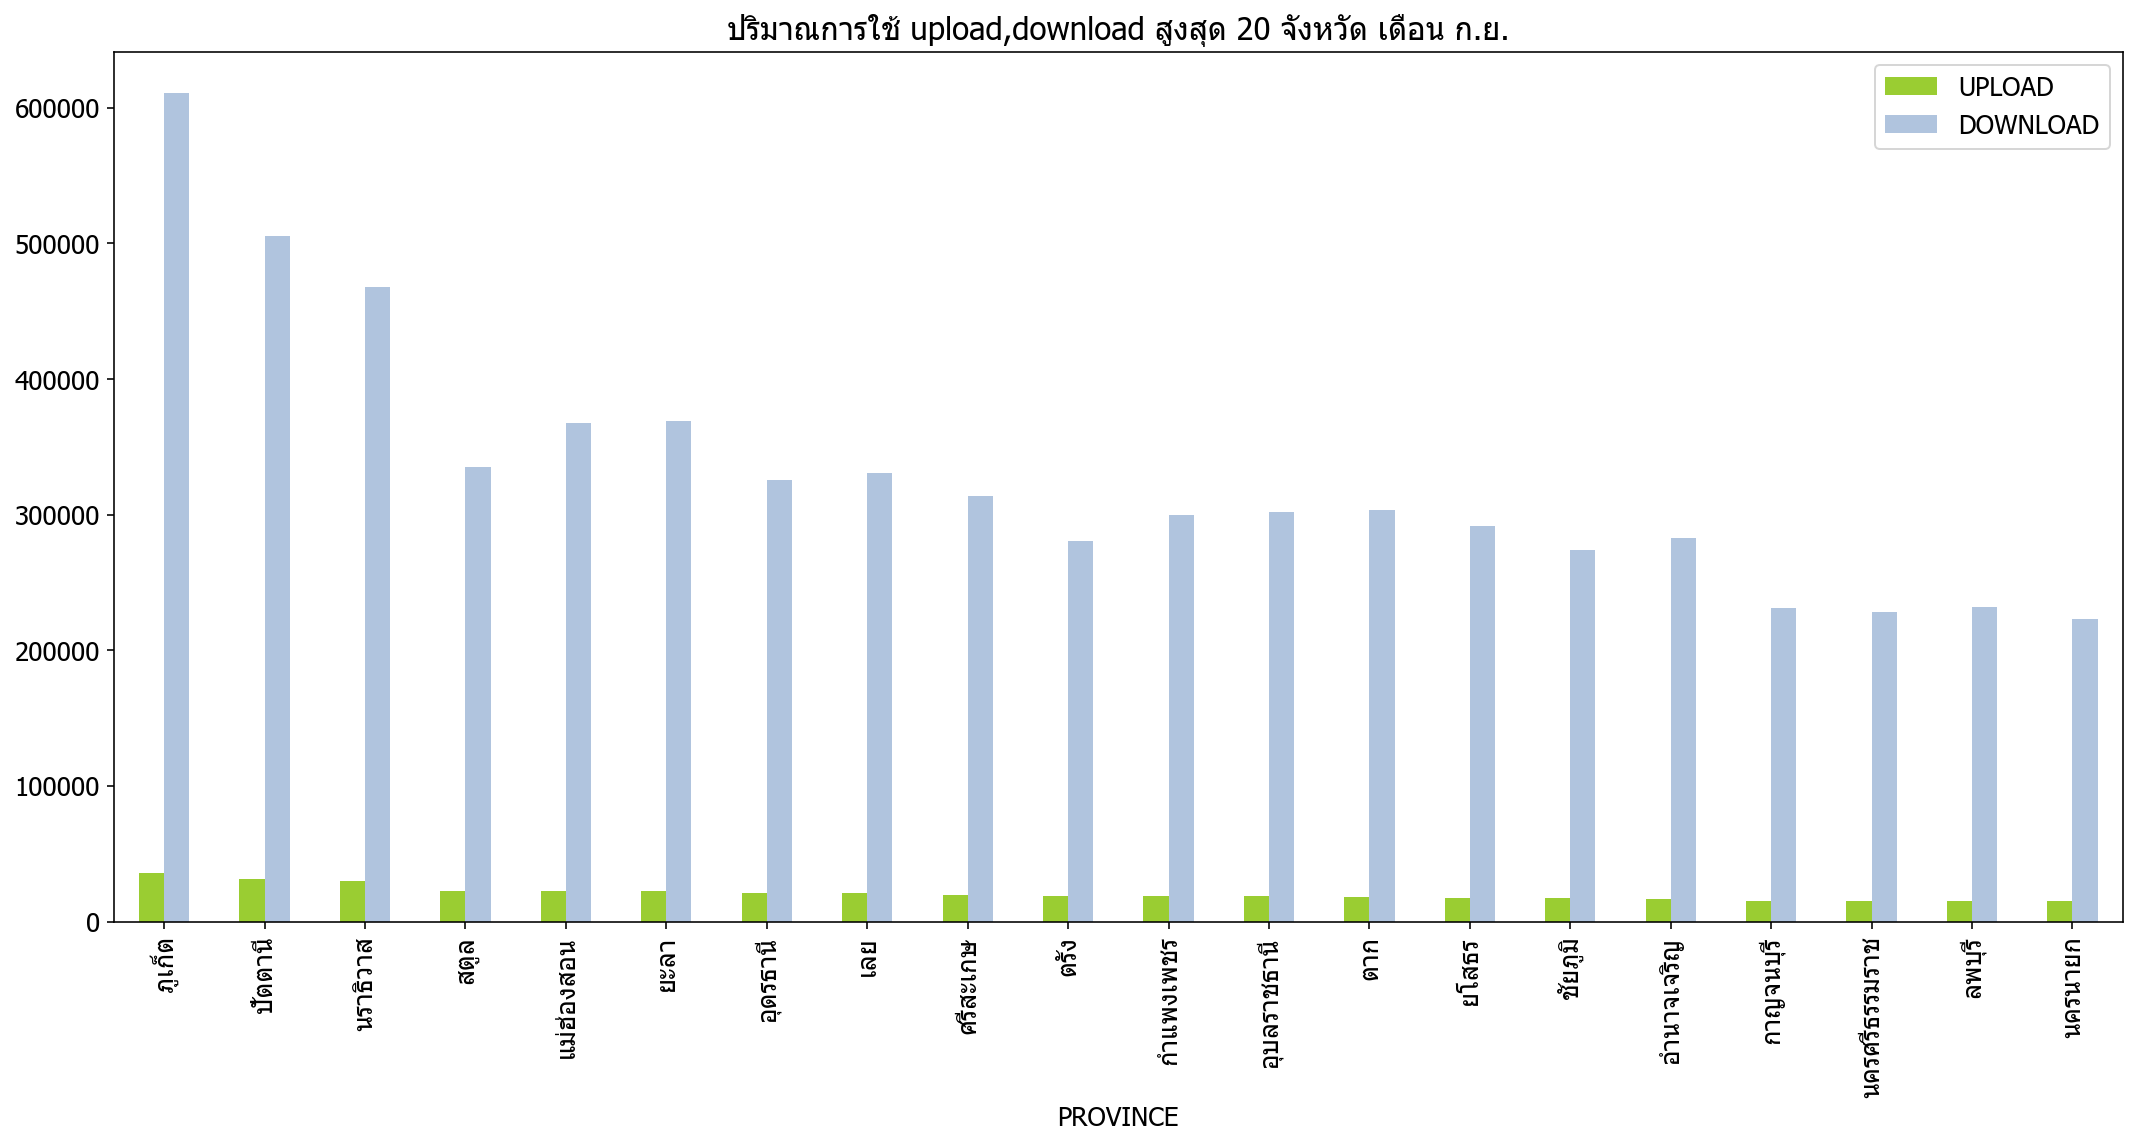

In [33]:
datasetsovrt[:20][['UPLOAD', 'DOWNLOAD']].plot(kind='bar', figsize=(18, 8), color=['yellowgreen', 'lightsteelblue'], title='ปริมาณการใช้ upload,download สูงสุด 20 จังหวัด เดือน ก.ย.');

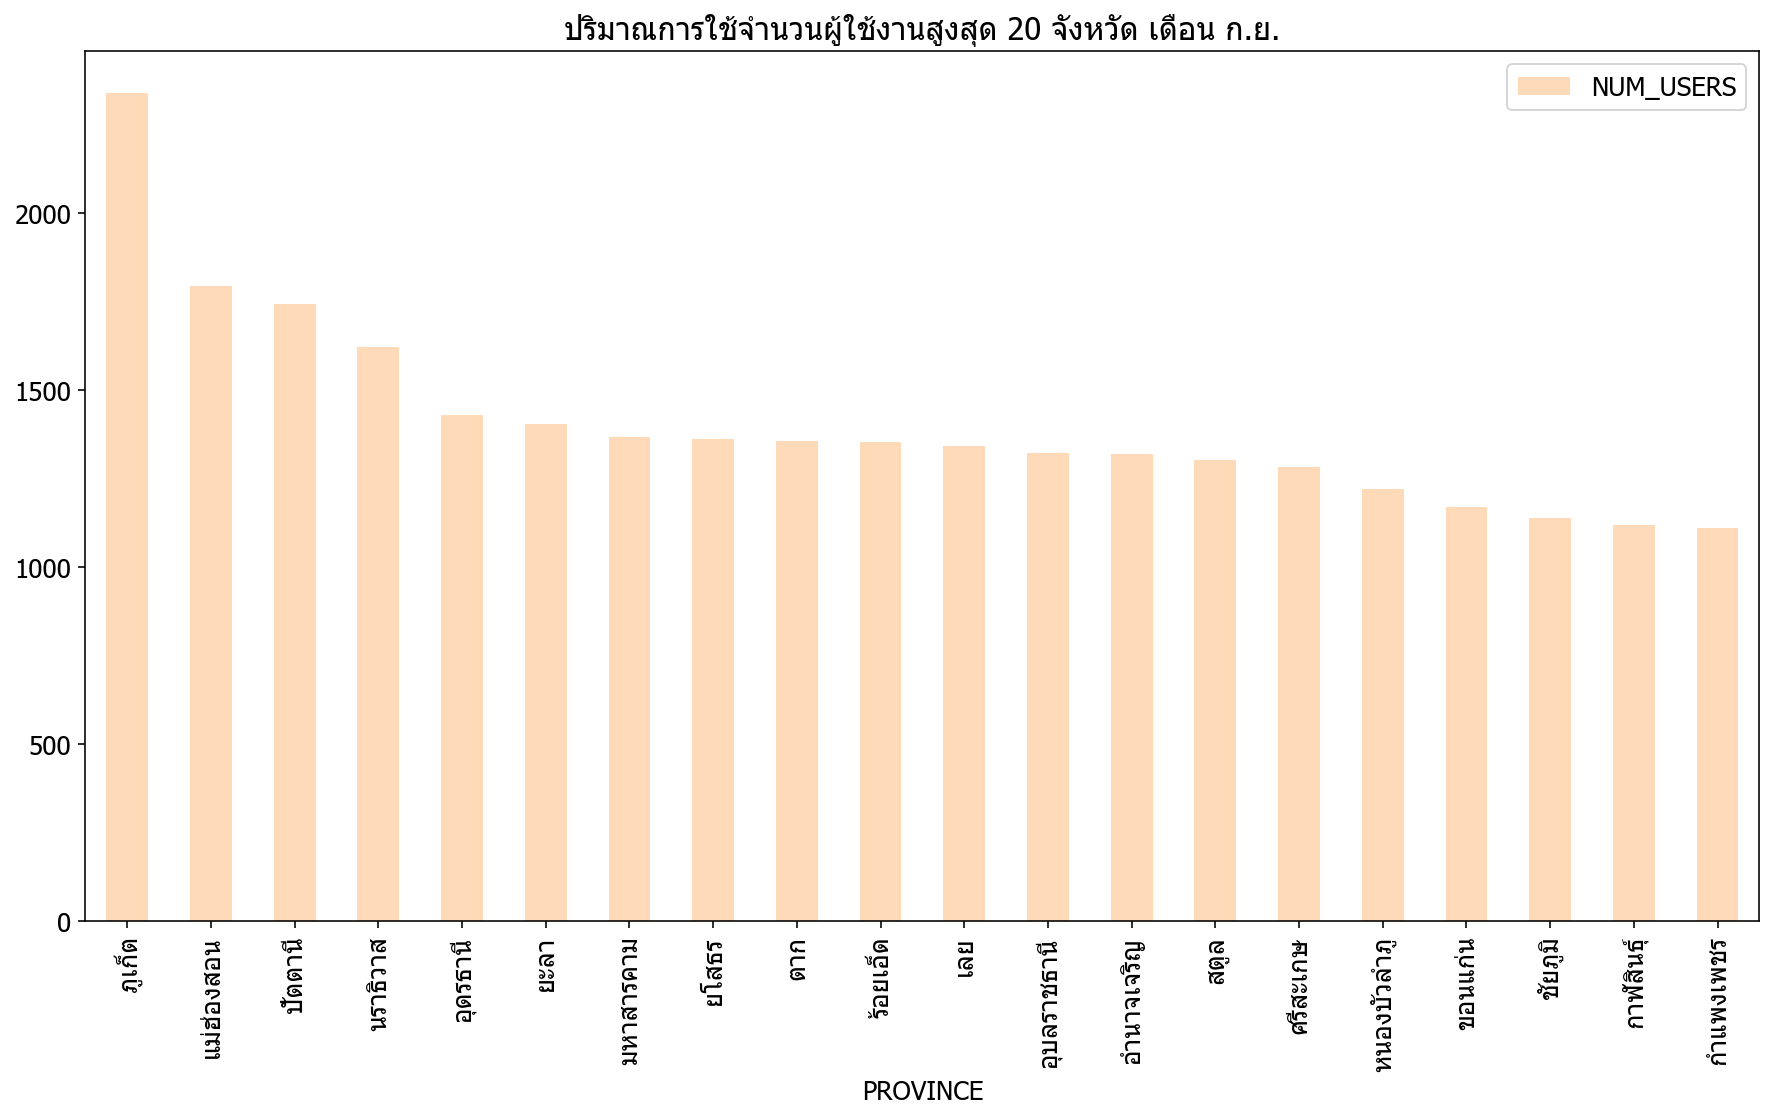

In [34]:
datasetso_u=datasetsovrt.sort_values(['NUM_USERS', 'PROVINCE'], ascending=[False, False])

datasetso_u[:20][['NUM_USERS']].plot(kind='bar', figsize=(15, 8), color=['peachpuff'], title='ปริมาณการใช้จำนวนผู้ใช้งานสูงสุด 20 จังหวัด เดือน ก.ย.');

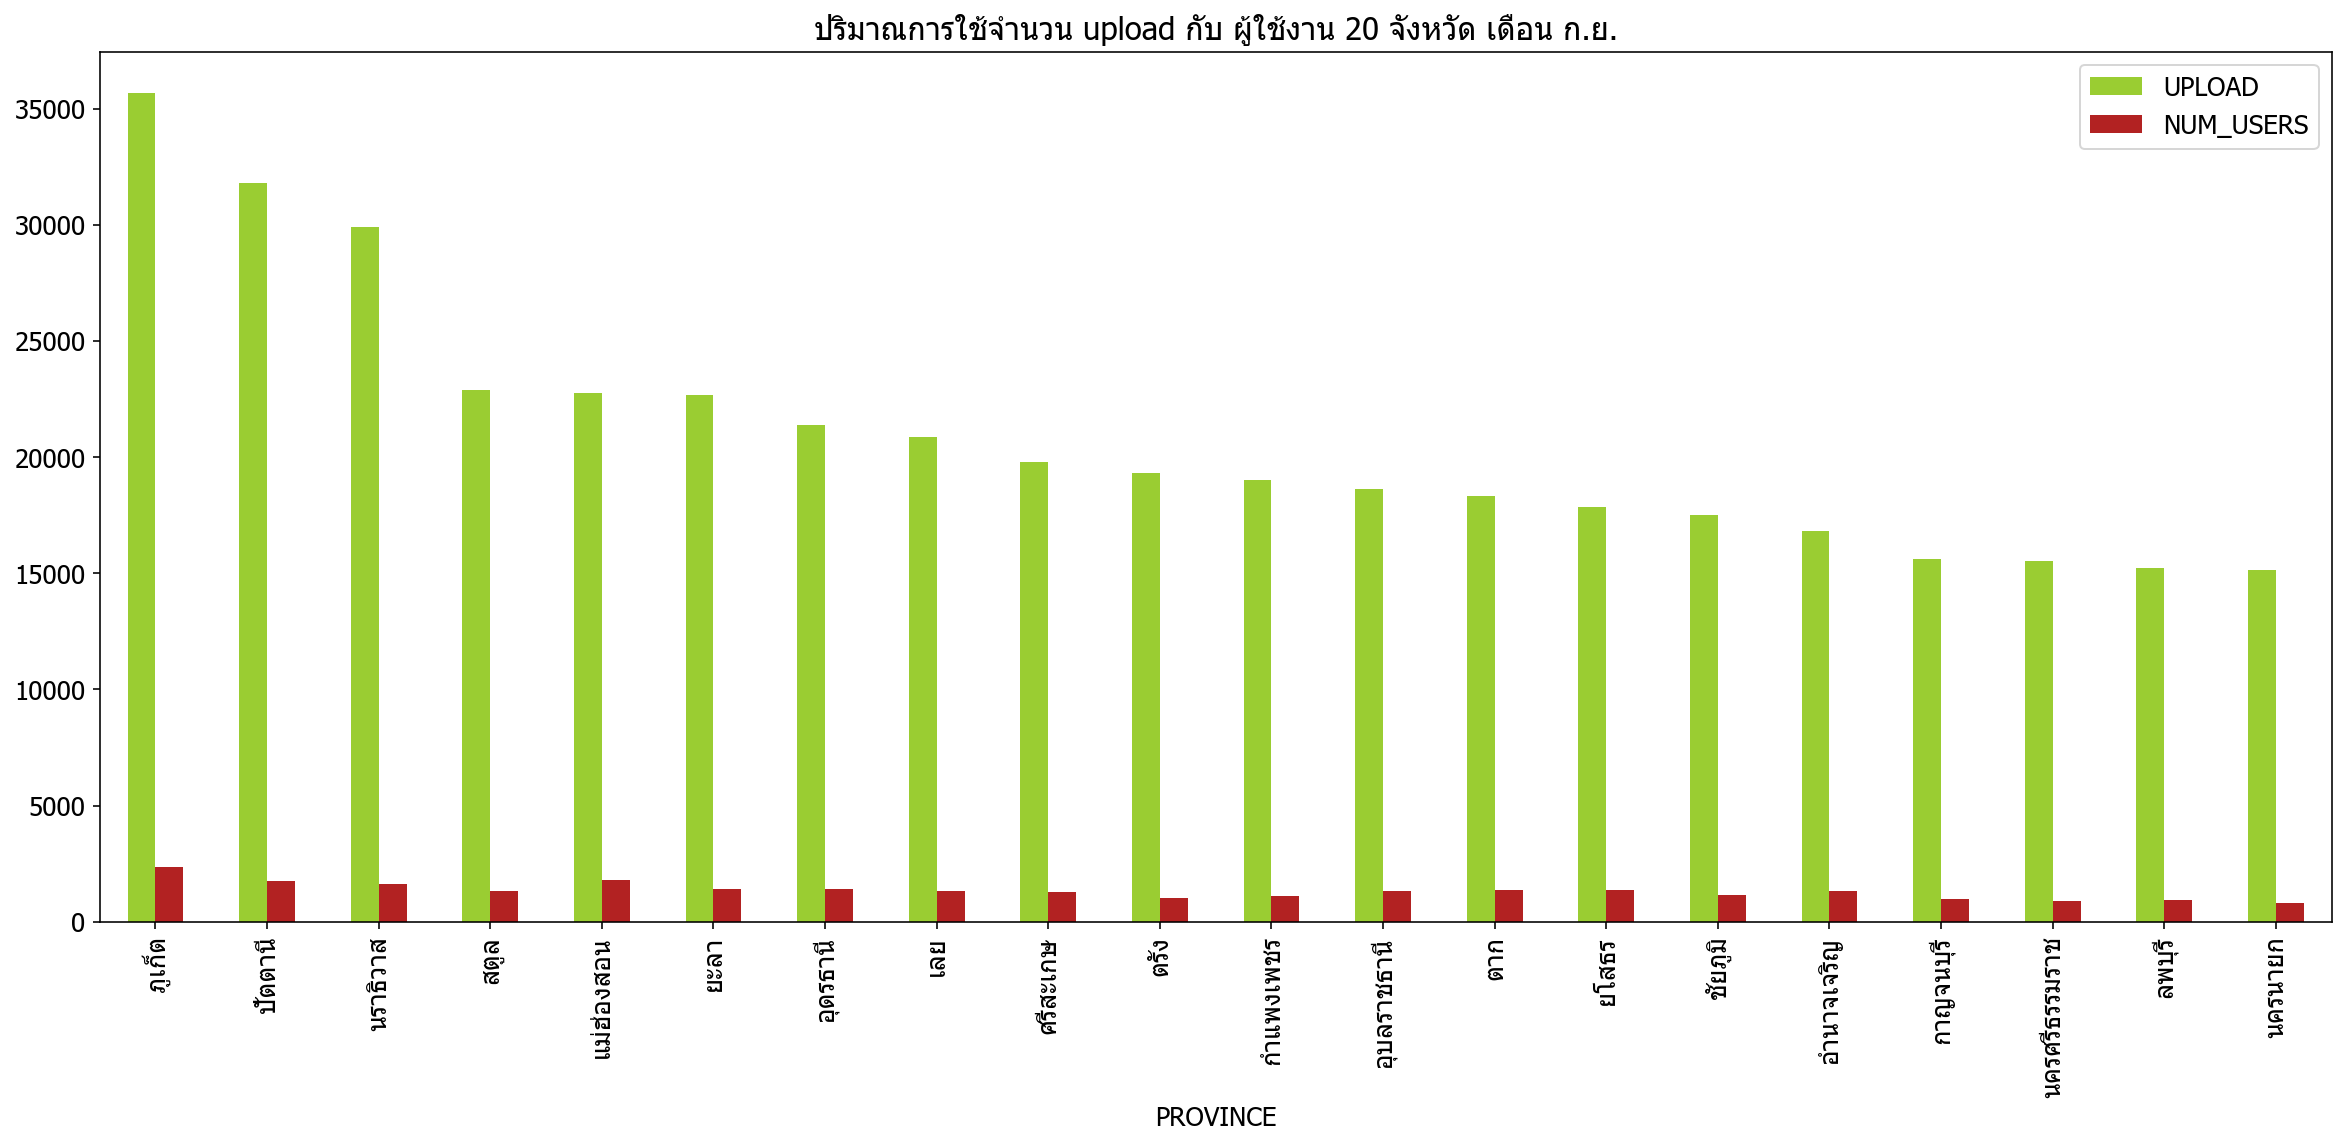

In [35]:
datasetsovrt[:20][['UPLOAD','NUM_USERS']].plot(kind='bar', figsize=(20, 8), color=['yellowgreen', 'firebrick'], title='ปริมาณการใช้จำนวน upload กับ ผู้ใช้งาน 20 จังหวัด เดือน ก.ย.');

# สรุป : วิเคราะ์ชุดข้อมูลทั้งหมด  1 เดือนย้อนหลัง (เฉพาะเดือน กันยายน 2564)

            
           
            -  จากชุดข้อมูลที่นำมาวิเคราะห์ ความต้องการใช้งานอินเตอร์เน็ตแยกตามแต่ละจังหวัด ก็มีปริมาณต้องการใช้งานอย่างมากอยู่
            
            -  การใช้งานอาจจะมีจุดบริการไม่ครอบคลุมหรือเพียงพอต่อการใช้งานของคนไทยอยู่มาก

# ข้อมูล 3 เดือนย้อนหลัง(กันยายน,สิงหาคม,กรกฏาคม)  ทำการวิเคราะ์และสรุปผล

#  Answer: 

    คำตอบในการใช้ข้อมูลชุดนี้ :
    
         1. การใช้งานอินเทอร์เน็ต ปริมาณการ UPLOAD,DOWNLOAD แต่ละเดือนเฉลียนมากน้อยเพียงใดและเพียงพอหรือไม่ต่อการใช้งาน ?
            
            >> จากชุดข้อมูลการให้บริการโครงข่ายอินเทอร์เน็ตความเร็วสูงผ่านสื่อสัญญาณสายเคเบิลใยแก้วนำแสง (FTTx) ให้ครอบคลุมหมู่บ้านเป้าหมาย 
            
            จำนวน 24,700 หมู่บ้านที่ได้นำมาวิเคราะห์ ข้อมูลการใช้บริการอินเตอร์เน๊ตฟรี จากผลวิเคราะห์ข้อมูลคนไทยเข้าใช้บริการอินเตอร์เน๊ตเป็นจำนวน
            
            มากทั่วทั้งประเทศ จะเห็นได้ว่าความต้องการใช้อินเตอร์เน๊ตยังมีมากพอสมควรอยู่ คนไทยส่วนมากตามต่างจังหวัดหรือตามต่างอำเภอที่ห่างไกลจาก
            
            ตัวเมืองก็ยังมีคนที่เข้าไม่ถึงโครงข่ายอินเตอร์เน๊ตอยู่มาก ทำให้การมาใช้บริการอินเตอร์เน๊ตฟรีของภาครัฐจึงได้รับความสนใจในใช้บริการจำนวนมาก
            
                
            
        
        2. การที่รัฐให้บริการอินเทอร์เน็ต 1 จุดต่อ 1 หมู่บ้าน "แบบใช้ฟรี" จะมีคนมาใช้งานมากหรือน้อยเพียงใด?
        
            >> จากชุดข้อมูลที่นำมาวิเคราะห์ ในงานใช้งานอินเตอร์เน๊ตอาจไม่เพียงพอต่อจำนวนผู้ใช้ของแต่ละหมู่บ้าน เพราะบ้างหมู่บ้านอาจจะมีจำนวน
            
            ประชากรที่อาศัยอยู่เยอะหรือน้อยแตกต่างกันไป ในการนำข้อมูลมาวิเคราะห์ทำให้เห็นว่าถ้าในอนาคตทางภาครัฐจะมีการนำข้อมูลการเก็บปริมาณสถิติ
            
            การใช้งานนเตอร์เน๊ตทั้งหมดนี้ไปทำการขยายจุดติดตั้งให้เพิ่มมากยิ่งขึ้น เพื่อที่ว่าจะได้เข้าถึงคนไทยที่ต้องการใช้งานอินเตอร์เน๊ตหรือคนไทยที่ยังไม่มี
            
            งบประมาณเพื่อลงทุนการซื้อใช้งานเองจากเจ้าบริการของเอกชน เพราะยังมีอีกหลายบ้านหลายคนที่ไม่มีโอกาสเข้าถึงได้..
            
            
            
        3. อนาคตทางภาครัฐจะมีโอกาสที่จะมีเพิ่มจุดบริการอินเทอร์เน็ต "ฟรี" อีกหรือไม่ เพื่อให้บรรลุเป้าหมายที่วางไว้ ? 
        
            >>  จากชุดข้อมูลถ้าในอนาคตภาครัฐ สามารถทำการขยายจุดติดตั้งการให้บริการอินเตอร์เน๊ตฟรี เพื่อบริการให้กับประชาชนไทยได้จำนวนมากขึ้น 
            
            นอกจาก 1 จุด 1 หมู่บ้านแล้ว อาจจะขยายไปตามวัด โรงเรียน หรือพื้นที่สาธารณะอื่นๆ เพิ่มเติมได้อีกหากมีโอกาสเป็นไปได้ เพื่อที่จะให้คนไทย
            
            ทุกๆคน ทุกๆที่เข้าถึงอินเตอร์เน๊ตเข้าถึงเทคโนโลยีได้ทุกที ตามเป้าหมายที่ภาครัฐได้วางเอาไว้ ในประเทศไทยก้าวทันโลก เด็กๆตามพื้นที่ห่างไกล
            
            สามารถก้าวทันเทคโนโลยีได้สะดวกรวดเร็ว ให้คนไทยตามที่ห่างไกลได้มีโอกาสพัฒนาคุณภาพชีวิตได้มากยิ่งขึ้น
            
            
           
           

# Challenge: ปัญหาที่เราพบและข้อสรุปการวิเคราะห์ข้อมูลชุดนี้


     -  ปัญหาที่พบ ข้อมูลจากแหล่งข้อมูลยังไม่ละเอียดพอที่จะทำให้วิเคราะห์ ลงไปลึกได้กว่านี้ หรือ วิเคราะห์ในรูปแบบที่หลักหลายกว่านี้
     
     -  คิดว่าบางจุดข้อมูลยังตั้งข้องสัยได้ไม่ค่อยละเอียดพอ ทำให้การวิเคราะห์ข้อมูลออกมาอาจจะยังไม่ละเอียดเท่าไรค่ะ
     
     
     
     ## ในข้อมูลชุดนี้ที่ได้ทำการวิเคราะห์ คาดว่าจะได้เอาไปต่อยอดได้อีกในอนาคต จากการได้วิเคราะห์ชุดข้อมูลเพื่อได้เห็นปริมาณและความต้องการใช้งาน
     
        อินเทอร์เน็ตของคนไทยทั่วประเทศ หากว่าสถิติข้อูลชุดนี้มีการใช้งานอินเทอร์เน็ตเพิ่มขึ้นเรื่อยๆ ทางภาครัฐก็อาจจะมีโครงการขยายจุดให้บริการเพิ่ม
        
        มากขึ้น เพื่อให้รองรับกับโครงการไทยแลนด์ 4.0 ตามเป้าหมายของภาครัฐ และก็จะเป็นผลดีต่อคนไทยที่อยู่ห่างไกลจะได้เข้าถึงเทคโนโลยีก้าว
        
        ทันโลกได้ง่ายขึ้น

In [25]:
df=groupdata.mean();
df

,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
month,,,,
August,15114.255466,237598.542874,1059.314332,86.146761
July,14235.032753,228125.618745,1002.059676,81.718138
September,14227.544980,224940.094696,1018.219757,86.280891


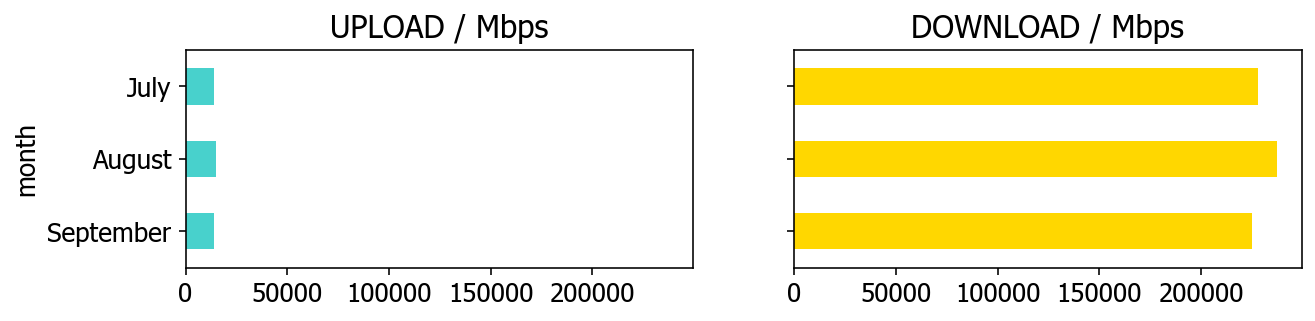

In [26]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['September', 'August', 'July']
df.loc[country_list, 'UPLOAD'].plot(kind='barh', color='mediumturquoise', ax=ax[0], title='UPLOAD / Mbps');
df.loc[country_list, 'DOWNLOAD'].plot(kind='barh', color='gold', ax=ax[1], title='DOWNLOAD / Mbps');


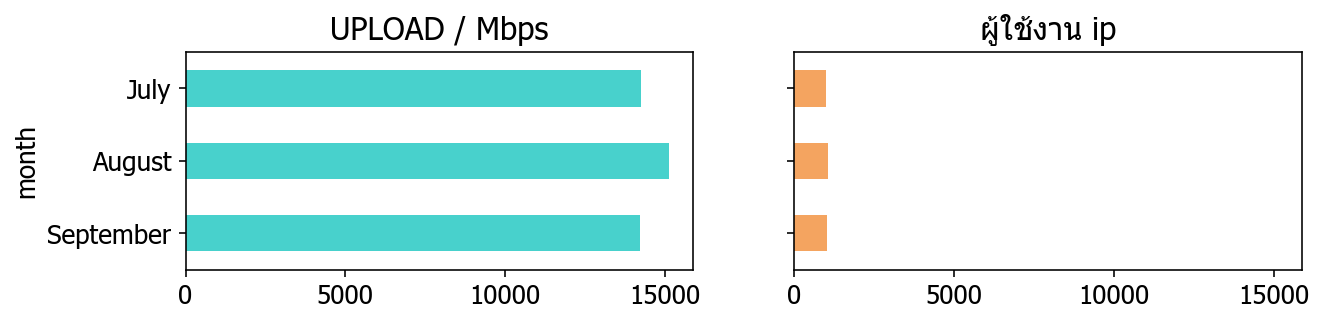

In [27]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['September', 'August', 'July']
df.loc[country_list, 'UPLOAD'].plot(kind='barh', color='mediumturquoise', ax=ax[0], title='UPLOAD / Mbps');
df.loc[country_list, 'NUM_USERS'].plot(kind='barh', color='sandybrown', ax=ax[1], title='ผู้ใช้งาน ip');

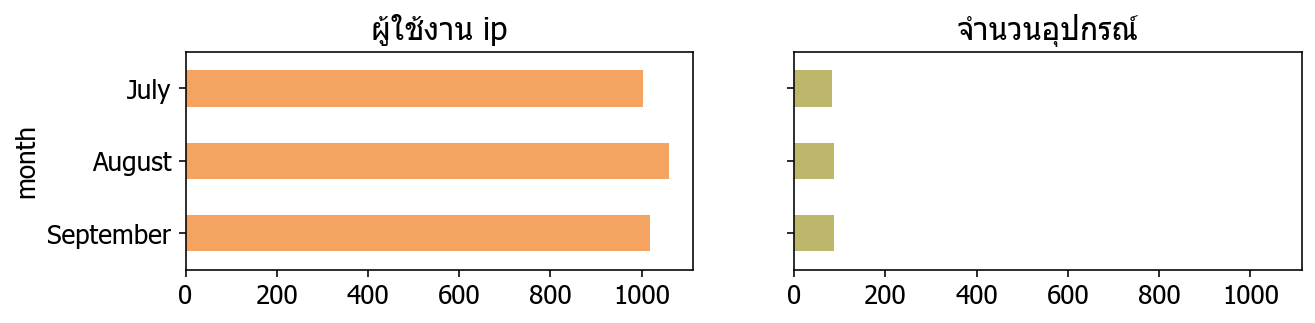

In [28]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['September', 'August', 'July']

df.loc[country_list, 'NUM_USERS'].plot(kind='barh', color='sandybrown', ax=ax[0], title='ผู้ใช้งาน ip');
df.loc[country_list, 'NUM_DEVICES'].plot(kind='barh', color='darkkhaki', ax=ax[1], title='จำนวนอุปกรณ์');

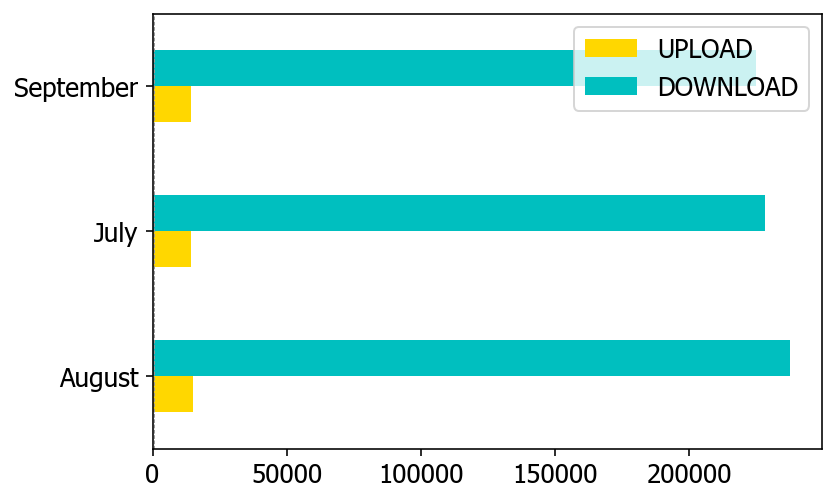

In [29]:
ax=df[:5][['UPLOAD', 'DOWNLOAD']].plot(kind='barh', color=['gold', 'c']);
ax.axvline(500, color=".6", linestyle="--", linewidth=.5)
ax.set_xlabel('')
ax.set_ylabel('');

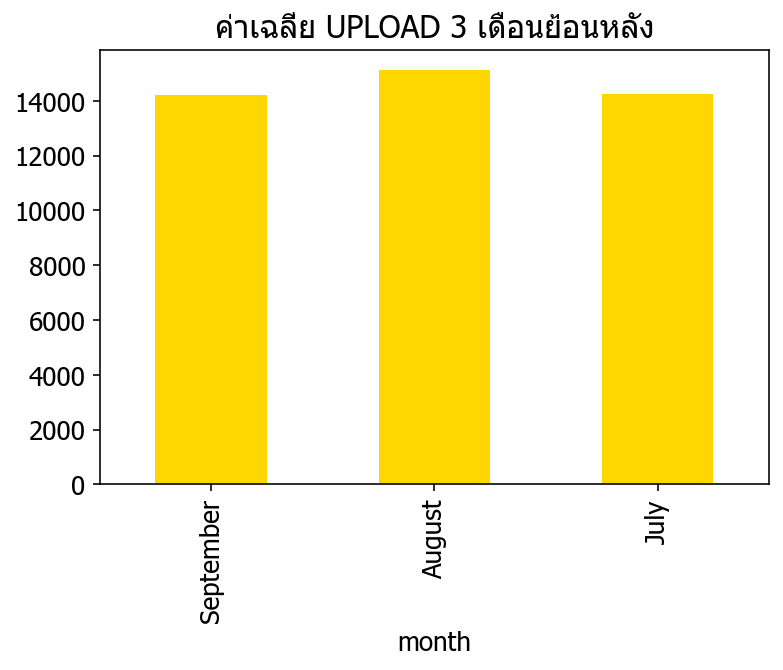

In [30]:
ax=df.loc[['September', 'August', 'July'], 'UPLOAD'].plot(kind='bar', color='gold' , title='ค่าเฉลี่ย UPLOAD 3 เดือนย่้อนหลัง')
ax.set_ylabel('');

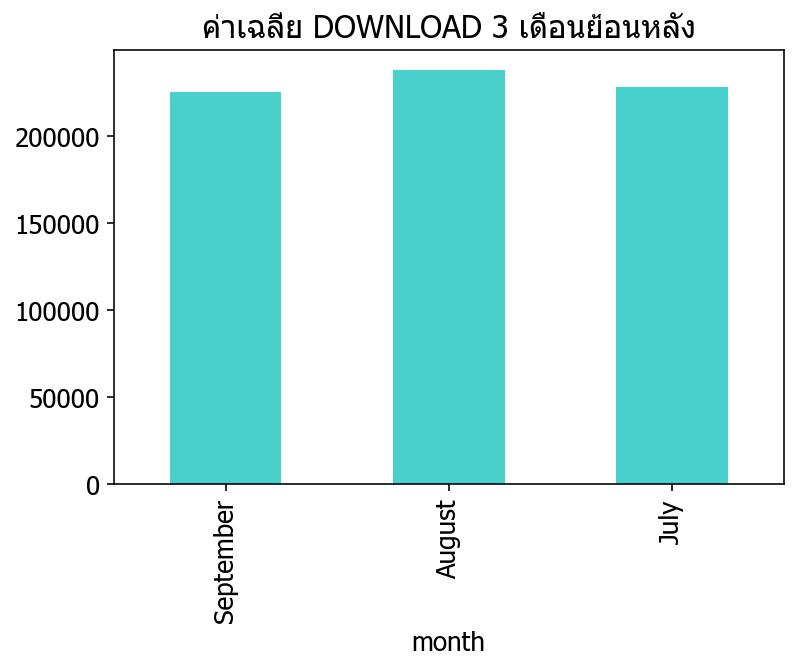

In [31]:
ax=df.loc[['September', 'August', 'July'], 'DOWNLOAD'].plot(kind='bar', color='mediumturquoise', title='ค่าเฉลี่ย DOWNLOAD 3 เดือนย่้อนหลัง')
ax.set_ylabel('');

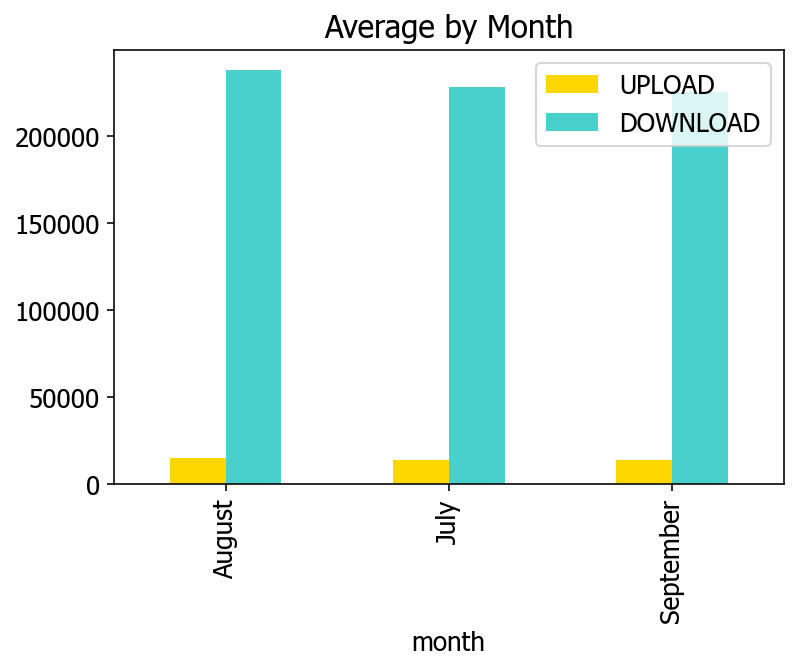

In [32]:
df[:10][['UPLOAD', 'DOWNLOAD']].plot(kind='bar', color=['gold', 'mediumturquoise'], title='Average by Month');